### CRISP-DM PHASE 1:  BUSINESS UNDERSTANDING 

### Business Problem: 
####  Are we collecting enough data to determine if National and State programs are adequately employing United States ‘veterans’ into the U.S. labor market? 
### Data Source: 
#### Data is based on U.S. Census Bureau Veteran Employment Outcome (VEO) Survey. This data is made available through the data sharing partnerships between the U.S. Army, U.S. Census Bureau, and State Labor Mark Information Offices. Data is available at both the state and national level. https://lehd.ces.census.gov/data/veo_experimental.html#tabulation-levels.  Several dataset are available; however, conducting an analysis on DoD Military Occoupational Code (MOS) to Industry Job mapping should show a trend on types of jobs servicemen and servicewomen held and length of employment. 


### Background:
#### Experimental survey is based on data sourced from US Army records. These records are shared with the US Census Bureau for recently discharged enlisted Army Veterans. 
### Business Outcome:
#### Identify trends and gaps in “Veteran” Labor Market by mapping and analyzing data from Army active duty discharged servicemen and servicewomen information to the national database of jobs. The timeframe of data collection is from 2000 and 2008. Data statistics for this Capstone include DoD Occupational Code/Specialization, Employer Industry Code, and veteran demographics (age and location).


In [89]:
# Libraries are imported and aliased correctly
import pandas as pd
import numpy as np
from sklearn.dummy import DummyClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import time

### 2.0 CRISP-DM PHASE 2: DATA UNDERSTANDING (Exploratory Data Analysis)
### - Load the Data


#### 2.1 Loading the Data
* Several datasets are available from the Census Bureau. I've loaded four datasets that include
    - Age, Location, Industry, and Dod to Industry mapping

In [90]:
# Load the muliltple datasets and merge them into a single dataframe
df1 = pd.read_csv(r'C:\Berkeley ML_AI\Module 24\veo_two_cohorts.csv')


# Display the first 5 rows of the dataframe
print(df1.head())

   cohort dod_occ_code  industry  y1_emp  y5_emp  y10_emp  y1_p25_earnings  \
0    2000          10X        11   202.0   198.0    158.0          18750.0   
1    2000          10X        21   789.0   981.0    939.0          33640.0   
2    2000          10X        22   293.0   504.0    510.0          28700.0   
3    2000          10X        23  5165.0  4769.0   3216.0          21490.0   
4    2000          10X        31  5870.0  6003.0   4866.0          23560.0   

   y5_p25_earnings  y10_p25_earnings  y1_p50_earnings  y5_p50_earnings  \
0          25870.0           25640.0          26270.0          33860.0   
1          48710.0           56160.0          48610.0          67860.0   
2          44690.0           54720.0          41690.0          62720.0   
3          28040.0           33240.0          29550.0          40360.0   
4          30410.0           35230.0          32680.0          42310.0   

   y10_p50_earnings  y1_p75_earnings  y5_p75_earnings  y10_p75_earnings  
0           

In [91]:
# Look for missing values
print(df1.isnull().sum())

cohort                0
dod_occ_code          0
industry              0
y1_emp               37
y5_emp               54
y10_emp             209
y1_p25_earnings      37
y5_p25_earnings      54
y10_p25_earnings    209
y1_p50_earnings      37
y5_p50_earnings      54
y10_p50_earnings    209
y1_p75_earnings      37
y5_p75_earnings      54
y10_p75_earnings    209
dtype: int64


In [92]:
# Looking at the dataframe's columns and Dtype
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cohort            378 non-null    int64  
 1   dod_occ_code      378 non-null    object 
 2   industry          378 non-null    int64  
 3   y1_emp            341 non-null    float64
 4   y5_emp            324 non-null    float64
 5   y10_emp           169 non-null    float64
 6   y1_p25_earnings   341 non-null    float64
 7   y5_p25_earnings   324 non-null    float64
 8   y10_p25_earnings  169 non-null    float64
 9   y1_p50_earnings   341 non-null    float64
 10  y5_p50_earnings   324 non-null    float64
 11  y10_p50_earnings  169 non-null    float64
 12  y1_p75_earnings   341 non-null    float64
 13  y5_p75_earnings   324 non-null    float64
 14  y10_p75_earnings  169 non-null    float64
dtypes: float64(12), int64(2), object(1)
memory usage: 44.4+ KB


In [93]:
# Look at the shape of the dataframe
print(df1.shape)

(378, 15)


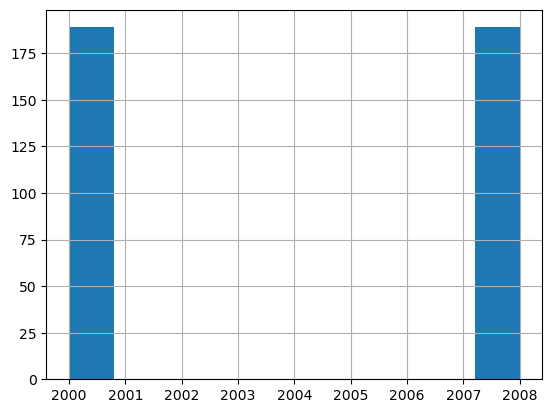

In [94]:
df1['cohort'].hist()
plt.show()


In [95]:
# Look a the statistical summary of the dataframe
print(df1.describe())

            cohort    industry       y1_emp       y5_emp      y10_emp  \
count   378.000000  378.000000   341.000000   324.000000   169.000000   
mean   2004.000000   52.428571   913.175953   807.552469   914.573964   
std       4.005302   22.521229  1139.653990  1125.855588  1145.945345   
min    2000.000000   11.000000    51.000000    50.000000    52.000000   
25%    2000.000000   42.000000   194.000000   155.750000   189.000000   
50%    2004.000000   53.000000   430.000000   361.000000   480.000000   
75%    2008.000000   62.000000  1179.000000   913.750000  1211.000000   
max    2008.000000   99.000000  7347.000000  8514.000000  7587.000000   

       y1_p25_earnings  y5_p25_earnings  y10_p25_earnings  y1_p50_earnings  \
count        341.00000       324.000000        169.000000       341.000000   
mean       25098.56305     31478.611111      36648.047337     35545.601173   
std         6695.66150      8857.626976      10272.412215     10105.864838   
min        14100.00000     173

In [96]:
# List column names
print(df1.columns)

Index(['cohort', 'dod_occ_code', 'industry', 'y1_emp', 'y5_emp', 'y10_emp',
       'y1_p25_earnings', 'y5_p25_earnings', 'y10_p25_earnings',
       'y1_p50_earnings', 'y5_p50_earnings', 'y10_p50_earnings',
       'y1_p75_earnings', 'y5_p75_earnings', 'y10_p75_earnings'],
      dtype='object')


In [97]:
# Look at unique values in the cohort column
print(df1['cohort'].unique())

[2000 2008]


In [98]:
# Look at unique values in the dod_occ_code column
print(df1['dod_occ_code'].unique())


['10X' '11X' '12X' '13X' '14X' '15X' '16X' '17X' '18X']


### 3.0 CRISP-DM PHASE 3: DATA PREPARATION

#### 3.1 Prepocess the Data/ Clean the Data/ Normalize the Data

In [99]:
# Clean the dod_occ_code column
# Remove rows with 0 in the dod_occ_code column
df1 = df1[df1['dod_occ_code'] != 0]

# Replace 10X, 11x, 12X, 13X, 14X, 15X, 16X, 17X, 18X with 0 in the dod_occ_code column
df1['dod_occ_code'] = df1['dod_occ_code'].replace('10X', 10)
df1['dod_occ_code'] = df1['dod_occ_code'].replace('11X', 11)
df1['dod_occ_code'] = df1['dod_occ_code'].replace('12X', 12)
df1['dod_occ_code'] = df1['dod_occ_code'].replace('13X', 13)
df1['dod_occ_code'] = df1['dod_occ_code'].replace('14X', 14)
df1['dod_occ_code'] = df1['dod_occ_code'].replace('15X', 15)
df1['dod_occ_code'] = df1['dod_occ_code'].replace('16X', 16)
df1['dod_occ_code'] = df1['dod_occ_code'].replace('17X', 17)
df1['dod_occ_code'] = df1['dod_occ_code'].replace('18X', 18)

In [100]:
# Show missing values in dod_occ_code column
print(df1['dod_occ_code'].isnull().sum())

0


In [101]:
# Show unique values in the dod_occ_code column
print(df1['dod_occ_code'].unique())

[10 11 12 13 14 15 16 17 18]


In [102]:
# Show unique values in the industry column
print(veo_df['industry'].unique())

[ 0 11 21 22 23 31 42 44 48 51 52 53 54 55 56 61 62 71 72 81 92 99]


In [103]:
# Remove rows with 0 in the industry column
df1 = df1[df1['industry'] != 0]

# Show missing values in the industry column
print(df1['industry'].isnull().sum())

# Show unique values in the industry column
print(df1['industry'].unique())


0
[11 21 22 23 31 42 44 48 51 52 53 54 55 56 61 62 71 72 81 92 99]


In [104]:
# Look for non-numeric rows
print(df1.dtypes)

cohort                int64
dod_occ_code          int64
industry              int64
y1_emp              float64
y5_emp              float64
y10_emp             float64
y1_p25_earnings     float64
y5_p25_earnings     float64
y10_p25_earnings    float64
y1_p50_earnings     float64
y5_p50_earnings     float64
y10_p50_earnings    float64
y1_p75_earnings     float64
y5_p75_earnings     float64
y10_p75_earnings    float64
dtype: object


In [105]:
# Convert all Nan values to 0
df1 = df1.fillna(0)

In [106]:
# Show unique values in the cohort column
print(df1['cohort'].unique())

[2000 2008]


<Axes: >

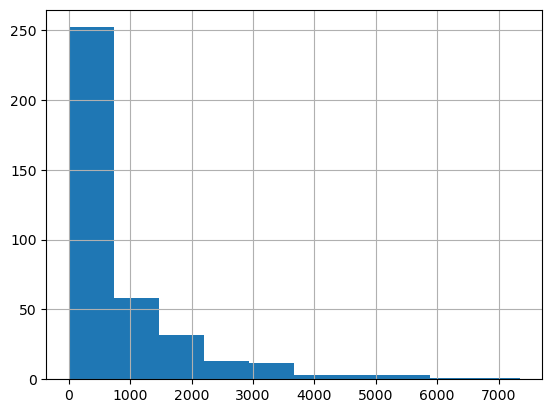

In [107]:
# show trend on 1 year employment
df1['y1_emp'].hist()

## 4.0 CRISP-DM PHASE 4: DATA MODELING

### 4.1Train - Test Split

In [108]:
# Identify the target variable
X = df1.drop('cohort', axis=1)
y = df1['cohort']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



### 4.2 Building a Baseline Model to compare performance metrics

In [109]:
# Build a baseline model and accuracy score

# Create a DummyClassifier object
dummy = DummyClassifier(strategy='most_frequent')

# Fit the model to the training data
dummy.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dummy.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the model
print('Accuracy:', accuracy)

Accuracy: 0.45614035087719296


### 5.0 CRISP-DM PHASE 5: MODEL EVALUATION

#### 5.1 Comparing each model's accuracy score with the baseline score

In [110]:
# Create a list of model names and models
model_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM']
models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    SVC()
]

# Create empty lists to store the results
train_scores = []
test_scores = []

# Iterate over each model
for model in models:
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Calculate the accuracy scores for training and test data
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    # Append the scores to the lists
    train_scores.append(train_score)
    test_scores.append(test_score)

# Create a dataframe to compare the models
results = pd.DataFrame({'Model': model_names, 'Train Accuracy': train_scores, 'Test Accuracy': test_scores})
results = results.set_index('Model')

# Print the dataframe
print(results)

                     Train Accuracy  Test Accuracy
Model                                             
Logistic Regression        0.962121       0.921053
KNN                        0.954545       0.929825
Decision Tree              0.977273       0.929825
SVM                        0.954545       0.929825


C:\Users\ahove\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### 5.2 Conducting Grid Search on Hyperparmeters on Best Model

In [111]:
from sklearn.metrics import make_scorer, accuracy_score

# Define the parameter values that should be searched
param_grid = {'max_depth': list(range(1, 11)), 'min_samples_split': list(range(2, 11)), 'min_samples_leaf': list(range(1, 11))}

# Create a scorer
scorer = make_scorer(accuracy_score)

# Create a GridSearch object
grid_obj = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring=scorer)

# Fit the data
grid_fit = grid_obj.fit(X, y)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Print the best parameters
print("Best parameters: ", grid_fit.best_params_)


Best parameters:  {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}


### Conducting Grid Search on selected models

In [112]:
# Create a list of model names and models
model_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM']
models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    SVC()
]

# Create a list of parameter grids for each model
param_grids = [
    {'C': [0.001, 0.01, 0.1, 1, 10]},
    {'n_neighbors': [3, 5, 7, 9]},
    {'max_depth': [None, 5, 10, 15]},
    {'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]}
]

# Perform grid search for each model
best_models = []
for i, model in enumerate(models):
    grid_search = GridSearchCV(model, param_grids[i], cv=5)
    grid_search.fit(X_train, y_train)
    best_models.append(grid_search.best_estimator_)

# Print the best hyperparameters for each model
for i, model_name in enumerate(model_names):
    print(f"Best hyperparameters for {model_name}:")
    print(best_models[i])
    print()

C:\Users\ahove\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ahove\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\ahove\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ahove\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best hyperparameters for Logistic Regression:
LogisticRegression(C=0.01)

Best hyperparameters for KNN:
KNeighborsClassifier()

Best hyperparameters for Decision Tree:
DecisionTreeClassifier(max_depth=5)

Best hyperparameters for SVM:
SVC(C=0.001, gamma=0.001)



### Checking the performance metrics for each model and creating a dataframe to show the results

In [113]:
# Create empty lists to store the metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Iterate over each model
for model in best_models:
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate the metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro' )
    f1 = f1_score(y_test, y_pred, average='macro')
    
    # Append the scores to the lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Create a dataframe to store the metrics
metrics_df = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy_scores, 'Precision': precision_scores, 'Recall': recall_scores, 'F1-score': f1_scores})
metrics_df = metrics_df.set_index('Model')

# Print the dataframe
print(metrics_df)

                     Accuracy  Precision    Recall  F1-score
Model                                                       
Logistic Regression  0.929825   0.929187  0.932382  0.929630
KNN                  0.929825   0.933333  0.935484  0.929803
Decision Tree        0.947368   0.946296  0.948511  0.947108
SVM                  0.456140   0.228070  0.500000  0.313253


C:\Users\ahove\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Plotting to show the visualization.  The black dotted line indicates best model to use.

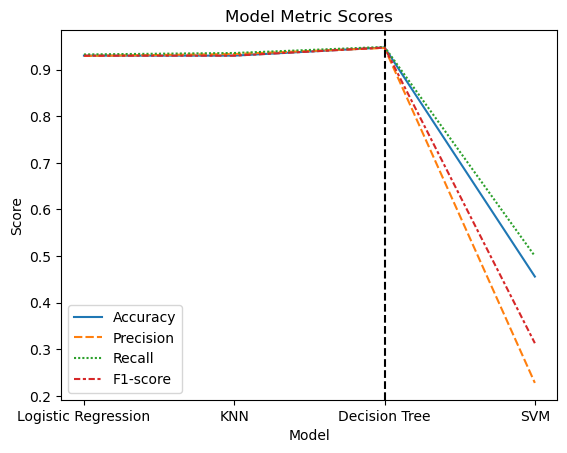

Best Model: Decision Tree


In [114]:
# Plot the metric scores using a line graph
sns.lineplot(data=metrics_df)

# Highlight the best model
best_model = metrics_df.idxmax().values[0]
plt.axvline(x=best_model, color='black', linestyle='--')

# Set the labels and title
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Metric Scores')

# Show the plot
plt.show()

# Print out Best Model
print(f"Best Model: {best_model}")



## CRISP-DM PHASE 6: DEPLOYMENT

Make predictions based on Logistic Regression Model

In [115]:
# Build a logistic regression model
logistic_regression_model = LogisticRegression()

# Fit the model to the training data
logistic_regression_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logistic_regression_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the model
print('Accuracy:', accuracy)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))



Accuracy: 0.9210526315789473
              precision    recall  f1-score   support

        2000       0.95      0.90      0.93        62
        2008       0.89      0.94      0.92        52

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114

[[56  6]
 [ 3 49]]


C:\Users\ahove\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


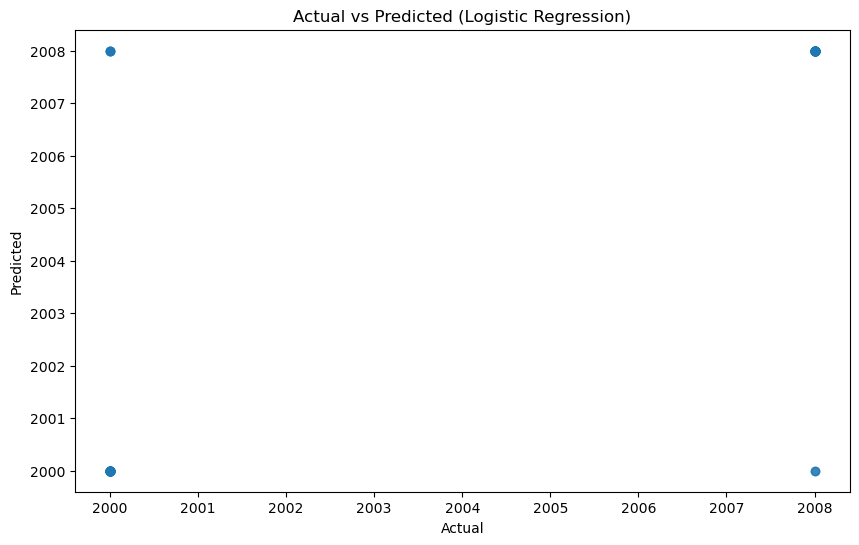

              precision    recall  f1-score   support

        2000       0.95      0.90      0.93        62
        2008       0.89      0.94      0.92        52

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



In [116]:
# Assuming that the LogisticRegression model has been trained and is named as 'logistic_regression_model'
# And the target variable for the test set is 'y_test'

# Predict the target variable
y_pred = logistic_regression_model.predict(X_test)

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (Logistic Regression)")
plt.show()

# Print out the classification report
print(classification_report(y_test, y_pred))


#### Conclusion

### Only using the selected data to show number of veterans employeed the first Cohort based on the DoD Occupational Code to Industry is not showing to have a better outcome than the second Cohort. US veteran labor market has the opportunity to improve veteran workforce.